# **Tècniques d'aprenentatge automàtic**

Pràctica de l'assignatura [Intel·ligència Artificial](https://estudis.uib.cat/estudis-de-grau/grau/informatica/GIN2-P/21722/) realitzada per *Harpo Joan* i *Miquel Àngel Llauger*

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

## **Índex**
1. [Introducció i contextualització](#introducció-i-contextualització)
   1. [Configuracions inicials](#configuracions-inicials)
3. [Anàlisi exploratòria de dades](#anàlisi-exploratòria-de-dades)
   1. [Anàlisi descriptiva de les dades](#anàlisi-descriptiva-de-les-dades)
   2. [Anàlisi inferencial](#anàlisi-inferencial)
4. [Reducció de dimensionalitat](#reducció-de-dimensionalitat)
    1. [Anàlisi de components principals](#anàlisi-de-components-principals)
    2. [*Clustering*](#clustering)
3. [Aplicació dels models i prediccions](#aplicació-dels-models-i-prediccions)
   1. [Perceptró](#perceptró)
   2. [Regressió logística](#regressió-logística)
   3. [Arbres de decisió](#arbres-de-decisió)
   4. [Boscs aleatoris](#boscs-aleatoris)
   5. [Màquines de vectors de suport](#màquines-de-vectors-de-suport)
4. [Discussió dels resultats i conclusió](#discussió-dels-resultats-i-conclusió)

</div>

## **Introducció i contextualització**

L'aprenentatge automàtic, també conegut com [*machine learning*](https://ca.wikipedia.org/wiki/Aprenentatge_automàtic), és un camp de la intel·ligència artificial centrat en l'estudi i desenvolupament d'algorismes que permeten "aprendre a les màquines". Segons la [definició de Tom Mitchell](https://www.cs.cmu.edu/~tom/mlbook.html), aquest aprenentatge és respecte d'una tasca i una mesura de rendiment, i es dona el fet que millora en el temps.

En el camp de la intel·ligència artificial, hi podem distingir diversos paradigmes com l'aprenentatge per reforç, l'aprenentatge automàtic o el que és conegut com "deep learning". Explicat de manera breu, l'aprenentatge automàtic permet als sistemes aprendre patrons a partir de dades sense ser programats explícitament. Els algorismes es milloren automàticament amb l'experiència, identificant aquestes correlacions entre dades d'entrenament per fer prediccions o prendre decisions sobre noves dades. Això suposa un avenç en quant al progrés humà aplicable a tots els camps, ja que ens permet establir relacions entre variables que fins ara ens podien passar per alt.

Concretament en aquesta pràctica implementarem diversos models i tècniques d'aprenentatge per reforç al mateix problema per a comparar els seus rendiments. Els models a desenvolupar són els següents:

* **Perceptró**: Algorisme d'aprenentatge supervisat per a classificadors binaris.
* **Regressió logística**: Model de classificació que prediu probabilitats mitjançant una funció logística (sigmoide) per a resultats binaris.
* **SVM (Màquines de Vectors de Suport)**: Algorisme que busca el pla òptim per separar les classes amb el marge més gran possible.
* **Arbres de decisió**: Model de classificació o regressió que divideix l'espai de característiques en decisions jeràrquiques basades en preguntes binàries.
* **Random forests**: Conjunt d'arbres de decisió entrenats de manera aleatòria per millorar la precisió i reduir l'overfitting.

Per posar en pràctica aquestes prediccions, se'ns presenta un [*dataset*](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data) amb informació detallada sobre les característiques del sòl i la vegetació del Bosc Nacional de Roosevelt, als Estats Units. Disposam de més de 580.000 mostres i 54 atributs de cada una. La finalitat de la pràctica és aplicar els models anteriorment llistats per a predir el tipus de coberta forestal associat a cada mostra. A termes generals, es tracta d'un **problema de classificació multiclasse** on 7 categories distintes representen els tipus de vegetació.

### **Configuracions inicials**

Com a preàmbul a la nostra feina necessitam importar les llibreries amb les que tractarem les dades i carregar l'arxiu *CSV* on les guardam, que es troba dins el subdirectori *data*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('data/forest_cover_type.csv')

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


---

## **Anàlisi exploratòria de dades**

La primera passa abans de començar a aplicar els models, és estudiar i analitzar el conjunt de dades amb el que farem feina per a ser conscients de les característiques del problema. Per això, a continuació s'adjunten una sèrie de passes en les que manipularem les dades per a familiaritzar-nos amb elles. 

### **Anàlisi descriptiva de les dades**

#### **Variables numèriques**
Aquestes són les variables numèriques que ens donen les dades: 

- **`Elevation`**: L'alçada en metres a què es troba la regió observada, s'assembla a una distribució normal. 

- **`Aspect`**: Descriu l'orientació en graus sexagesimals (1-360) de la regió. Possiblement es podria agrupar en 'N', 'S', 'E' i 'W'. 

- **`Slope`**: Pendent de la regió en graus. 

- **`Horizontal_Distance_To_Hydrology`**: Distància horitzontal a punts hidrològics. S'aproxima a una distribució exponencial. 

- **`Vertical_Distance_To_Hydrology`**: Distància vertical a punts hidrològics. No es tan explicativa i conté valors negatius. 

- **`Horizontal_Distance_To_Roadways`**: Distància horitzontal a punts de carretera, presenta un màxim amb una ascenció forta. 

- **`Hillshade_9am`**: Fa referència a la quantitat d'ombra que rep la zona a les 9:00 hores amb una magnitud 1-250.

- **`Hillshade_Noon`**: Fa referència a la quantitat d'ombra que rep la zona al migdia (mateixes unitats que l'anterior). 

- **`Hillshade_3pm`**: Fa referència a la quantitat d'ombra que rep la zona al migdia cap a les 3: sembla seguir una distribució normal. 

- **`Horizontal_Distance_To_Fire_Points`**: Distància horitzontal a punts de foc. Distribució molt acumulada entorn el màxim.

Vegem com estan distribuïdes en el nostre *dataset*: 

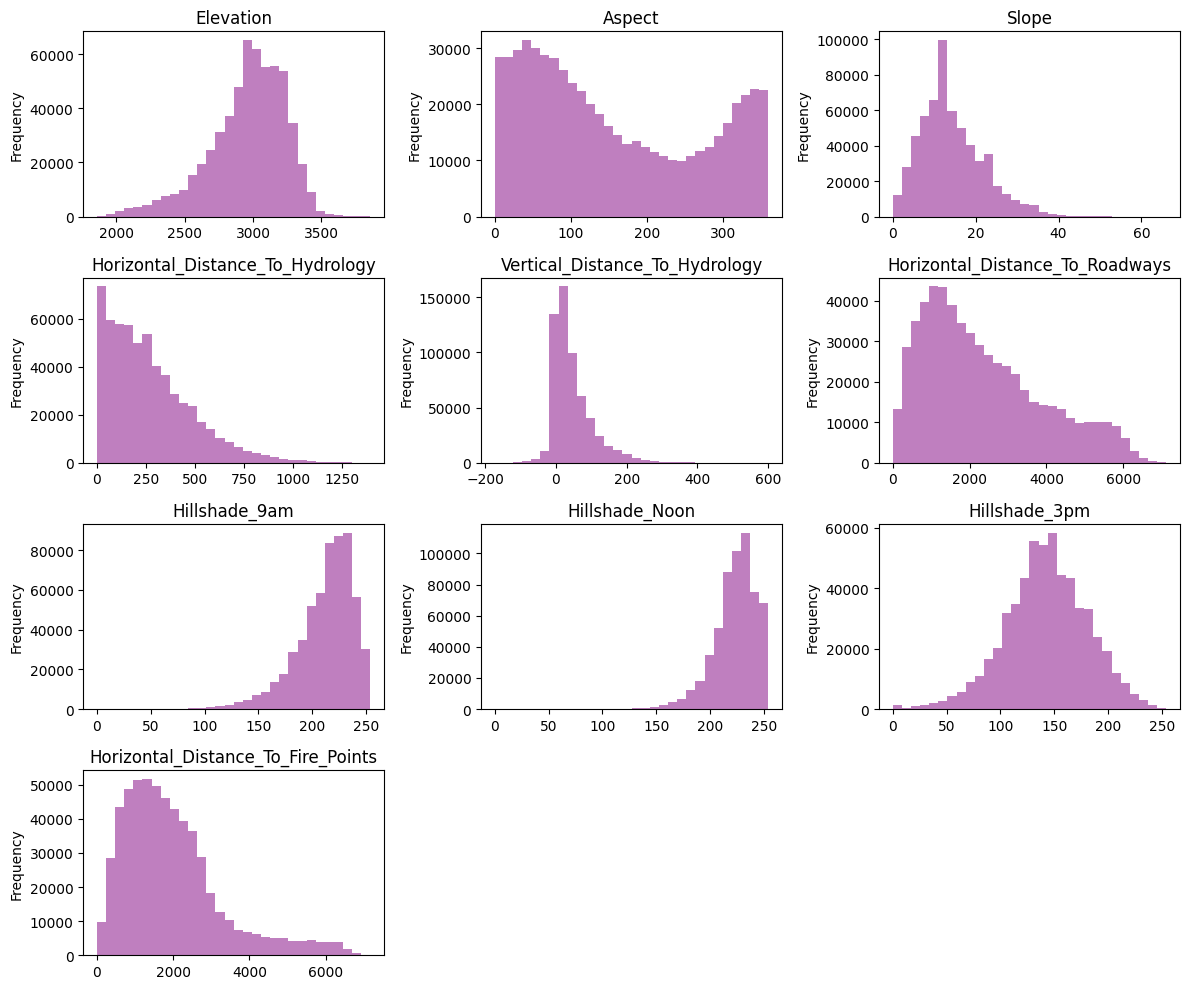

In [2]:
numeriques = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeriques, 1):
    plt.subplot(4, 3, i)
    data[col].plot(kind='hist', bins=30, color='purple', alpha=0.5)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

##### **Conclusions**
1. La majoria de variables numèriques demostren una **falta de normalitat** excepte **`Hillshade_3pm`**.
2. Moltes variables presenten talls importants després o abans del seu màxim : **`Hillshade_9am`**, **`Horizontal_Distance_To_Fire_Points`**, **`Hillshade_Noon`**...
3. La distància horitzontal a punts d'aigua sembla suggerir una distribució de tipus exponencial decreixent.
4. Hi ha moltes relacions entre les variables, com per exemple les distàncies horitzontal i vertical. Una possibilitat **de cara a la reducció de dimensionalitat** seria considerar la distància euclidiana a partir d'aquestes dues i suprimir-les.

</div>

#### **Variables categòriques**

Anem a ordenar i entendre el nostre dataset amb l'objectiu de fer una bona anàlisi exploratòria, que serà important per interpretar el resultat dels diferents models. 
##### **La variable `Soil`**
En el dataset original hi tenim 40 columnes específicament dedicades a cada tipus de terra. Això és innecessari!
En primer lloc, cream una nova variable categòrica que reculli el tipus de terra (Soil_type) al que pertany cada àrea. 
Definim la variable 'Soil', que contindrà nombres enters del 1 al 40 pels quaranta tipus diferents de terra:

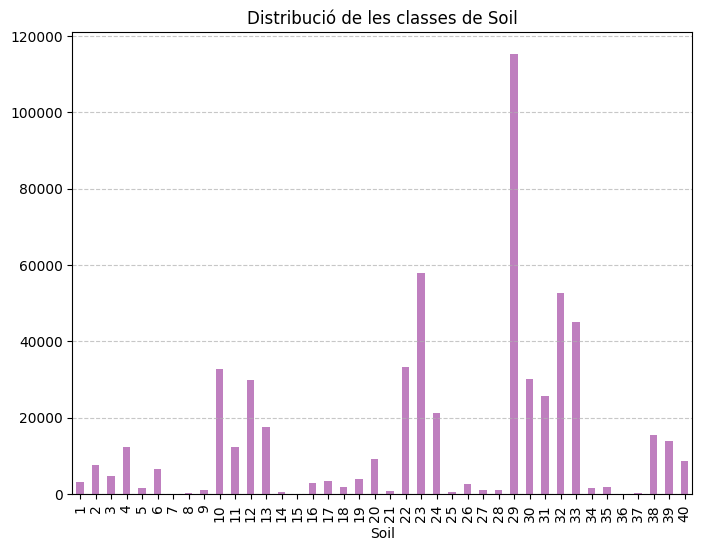

In [3]:
subclean_data = data.iloc[:,14:54].copy()
subclean_data.columns = [i+1 for i in range(len(subclean_data.columns))]
subclean_data.head()
subclean_data['Soil'] = subclean_data.idxmax(axis=1)
soil = subclean_data[['Soil']]
obj = data.iloc[:,54]
soil1 = subclean_data['Soil'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
soil1.plot(kind='bar', color='purple', alpha=0.5)
plt.title('Distribució de les classes de Soil')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Amb la variable categòrica 'Soil' hi ha categories que gairebé no apareixen i, donada la longitud del dataset, n'hi ha que ho fan amb una proporció molt baixa. Per fer poder fer feina amb aquesta categoria, farem alguns canvis. Ens quedem amb les que tenen un mínim de 10000 representants: 

##### **La variable `Wilderness_Area`**

Aquesta variable categòrica separa les mostres en 4 àrees segons l'observació, i tornam a veure una descompensació pel que fa al nombre d'aparicions de cada àrea i la presència de les diferents classes de **`Cover_Type`** dins cada una. Per visualitzar les dades hem fet un diagrama de barres i un de formatgets. 

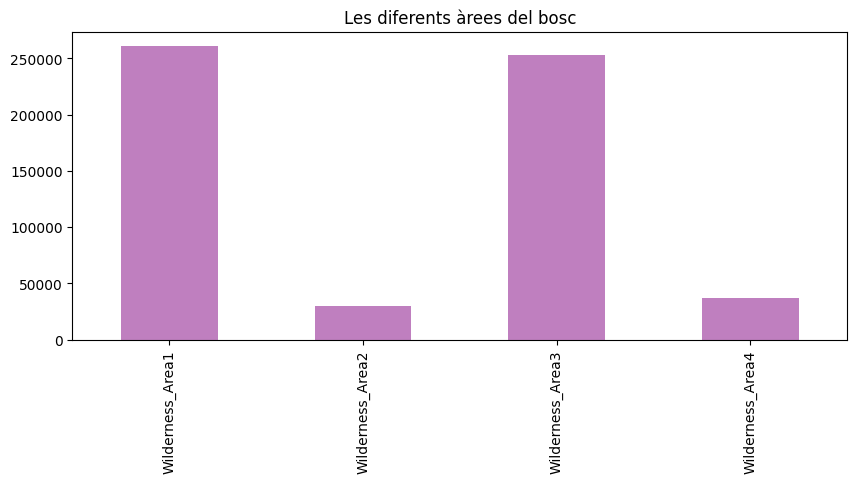

In [4]:
columnes = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
arees = data[columnes].sum()
plt.figure(figsize=(10, 4))
arees.plot(kind='bar', color='purple', alpha=0.5)
plt.title("Les diferents àrees del bosc")
plt.show()

Obseracions Àrea 1: 260796
Obseracions Àrea 2: 29884
Obseracions Àrea 3: 253364
Obseracions Àrea 4: 36968
Cover_Type
2    146197
1    105717
7      5101
5      3781
Name: count, dtype: int64


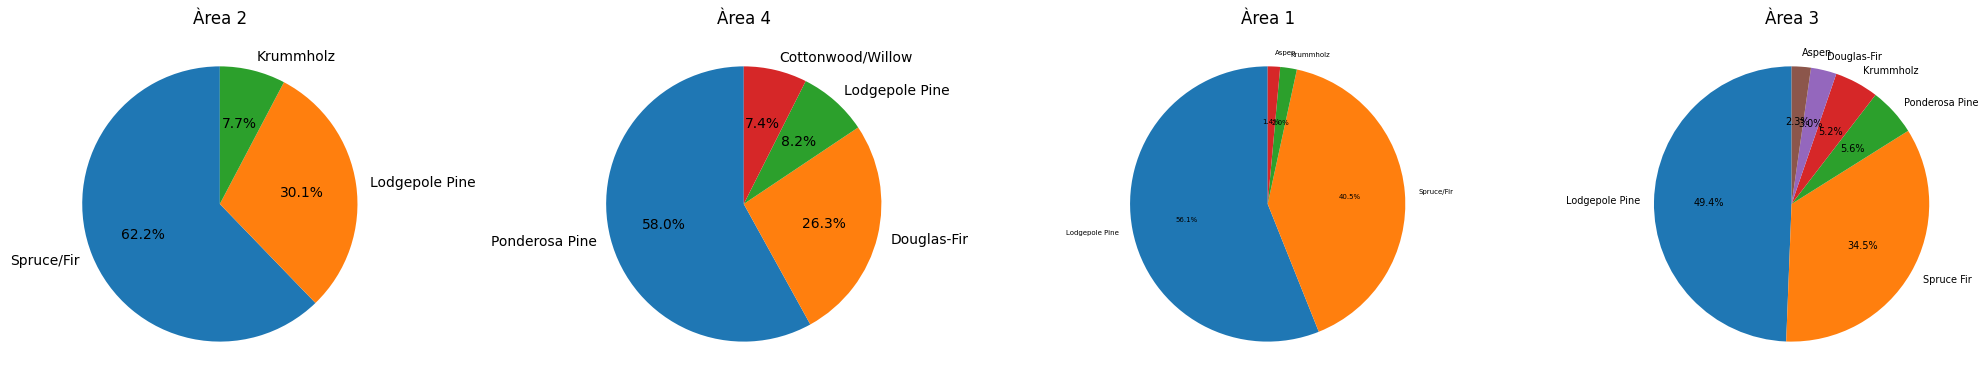

In [5]:
d1 = data[data['Wilderness_Area1'] == 1]
d2 = data[data['Wilderness_Area2'] == 1]
d3 = data[data['Wilderness_Area3'] == 1]
d4 = data[data['Wilderness_Area4'] == 1]

print(f'\033[1mObseracions Àrea 1:\033[0m {len(d1)}')
print(f'\033[1mObseracions Àrea 2:\033[0m {len(d2)}')
print(f'\033[1mObseracions Àrea 3:\033[0m {len(d3)}')
print(f'\033[1mObseracions Àrea 4:\033[0m {len(d4)}')

counts = d1['Cover_Type'].value_counts()
print(counts)
count2 = d2['Cover_Type'].value_counts()
count3 = d3['Cover_Type'].value_counts()
count4 = d4['Cover_Type'].value_counts()
labels1 = ['Lodgepole Pine', 'Spruce/Fir', 'Krummholz', 'Aspen']
labels2 = ['Spruce/Fir', 'Lodgepole Pine', 'Krummholz']
labels3 = ['Lodgepole Pine', 'Spruce Fir', 'Ponderosa Pine', 'Krummholz', 'Douglas-Fir', 'Aspen']
labels4 = ['Ponderosa Pine', 'Douglas-Fir', 'Lodgepole Pine', 'Cottonwood/Willow']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[2].pie(counts, labels = labels1,textprops={'fontsize': 5}, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Àrea 1')

axes[0].pie(count2, labels = labels2, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Àrea 2')

axes[3].pie(count3, labels = labels3, textprops={'fontsize': 7}, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Àrea 3')

axes[1].pie(count4, labels = labels4, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Àrea 4')

plt.tight_layout()
plt.show()

##### **La variable objectiu: `Cover_Type`**

En aquest treball, el nostre objectiu serà **predir les diferents classes de cobertura de la regió del bosc**, que ve determinada per la variable categòrica **`Cover_Type`**. Tenim 7 tipus de cobertura:
- `Spruce/Fir` (1)
- `Lodgepole Pine` (2)
- `Ponderosa Pine` (3)
- `Cottonwood/Willow` (4)
- `Aspen` (5)
- `Douglas-fir` (6)
- `Krummholz` (7)

Vegem la seva distribució: 

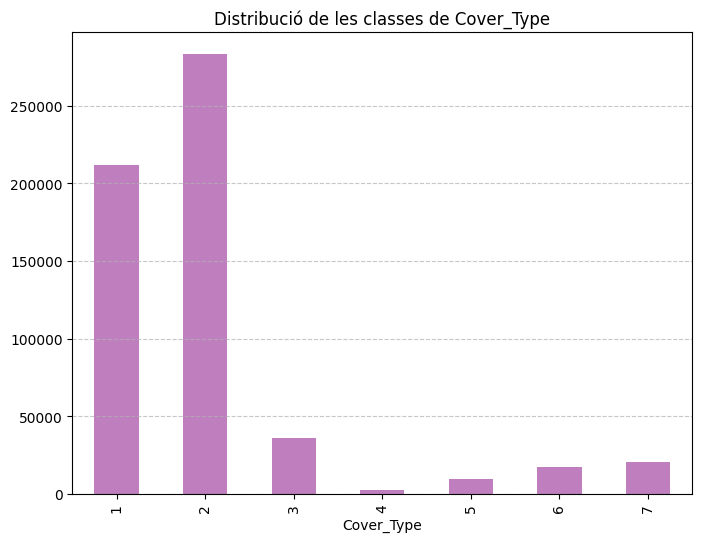

In [6]:
cover_type= data['Cover_Type'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
cover_type.plot(kind='bar', color='purple', alpha=0.5)
plt.title('Distribució de les classes de Cover_Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observam que la distribució de la variable objectiu dista molt de ser equilibrada. En efecte, pel que a la predicció, **el nostre dataset no està gens balancejat entre classes**. Això serà un problema més endavant, ja que, en més d'un 80%, **predominen les classes 1 i 2**.

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Conclusions**
- Les classes de Cover_Type més esteses són la **Spruce/Fir** (1) i la **Lodgepole Pine** (2), amb presència a les **Àrees 1,2 i 3**.
- L'Àrea 4 és la única que conté l'espècie **Cottonwood/Willow** (4) (pot ser important per la predicció d'aquest tipus) i, juntament amb l'àrea 3, són les úniques que contenen la classe **Douglas-fir** (6) i **Ponderosa Pine (3)**.
- L'àrea 3 és la que presenta **una distribució més variada** (conté totes les classes d'arbres excepte la 4) a més de ser la segona àrea amb més observacions: tendrà poca correlació amb la variable objectiu.
- Les àrees 1 i 2 són molt semblants pel que fa a contingut de classes.

En conseqüència: 

Suprimirem aquelles categories de **`Soil_Type`** que no apareixen o que, ho fan amb una freqüència relativa inferior al 0.1. 

Finalment, **ho unim tot a un nou dataset:** ***clean_data***.
Observam que amb el nou dataset és molt més manejable que l'original, **ja que conté moltes menys variables tipus de 'soil' poc explicatives**. A partir d'aquí, començarem amb les tècniques de reducció de dimensionalitat. 

In [7]:
data_unsoiled = data.drop(['Soil_Type15', 'Soil_Type7', 'Soil_Type36', 'Soil_Type8', 'Soil_Type28',
                 'Soil_Type37', 'Soil_Type25', 'Soil_Type14', 'Soil_Type21', 'Soil_Type27', 'Soil_Type9', 'Soil_Type5',
          'Soil_Type34', 'Soil_Type35', 'Soil_Type18', 'Soil_Type26', 'Soil_Type16', 'Soil_Type1', 'Soil_Type17', 'Soil_Type19',
          'Soil_Type3', 'Soil_Type6', 'Soil_Type2', 'Soil_Type40', 'Soil_Type20'], axis=1).copy()

soil_final = data_unsoiled.iloc[:, 14:29]

clean_data = pd.concat([data.iloc[:,0:10], data[columnes], data['Cover_Type'],soil_final], axis=1)
clean_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type38,Soil_Type39
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,1,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,1,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,1,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,1,0,0,0,0,0,0


### **Anàlisi inferencial**

Ara que ja coneixem per damunt la fesomia de les variables, anem a extreure conclusions **de cara a la reducció de dimensionalitat**. L'objectiu d'aquesta part serà conèixer les relacions entre les variables i **veure si n'existeixen redundàncies**. Per a fer-ho en primer lloc considerarem la matriu simètrica M de correlacions mostrals que prèn la forma: 
$$ M = (r_{ij}) = \frac{\mathrm{cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}}\in [-1,1]$$
on $\mathrm{cov}(X_i, X_j)$ representa la covariància entre les variables $X_{i}$ i $X_{j}$ i $\sigma_{X_i}$ fa referència a la desviació típica. 
Amb això, podem visualitzar el **mapa de calor**, que no és més que una representació més visual d'aquesta matriu. En el nostre cas, **això fa referència només a les variables numèriques**:

In [8]:
heat_data = clean_data.iloc[:, 0:10]
corr = heat_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Com podem observar, els calors més càlids fan refèrencia a coeficients de correlació de Pearson més alts, i els més freds a coeficients més baixos. Des del punt de vista estadístic, coeficients de correlació pròxims a 1 en valor absolut indiquen **forta correlació lineal** positiva o negativa en funció del signe, entre les nostres variables. **És a dir, que una variable es pot expressar com una funció lineal d'una altra: creen una redundància en el nostre dataset**. 

En el nostre cas, tenim alguna relació lineal evident positiva tot i que, predominen valors pròxims al 0: incorrelació. Algunes relacions semblen òbvies i tenen un sentit propi a la naturalesa de les observacions del bosc: 

- Les diferents **`'Hillshades'`** presenten correlacions majors que 0.5 en valor absolut.
- Les **distàncies horitzontal/vertical a punts hidrològics estan fortament correlacionades**.

Per tant, **de cara a la reducció de dimensionalitat**, pot ser interessant: 
1. Considerar una nova variable basada en la mitjana de les 3 **`'hillshades'`**. 
2. Ajuntar distàncies horitzontal i vertical a punts hidrològics en una única variable: la distància euclidiana
3. **Considerar la mitjana** de les distàncies a punts d'incendi i carreteres.

#### **Relació amb `Cover_Type`**

Passam a veure gràficament la presència de cada tipus de vegetació dins cada variable. Observem els següents **boxplots**: 

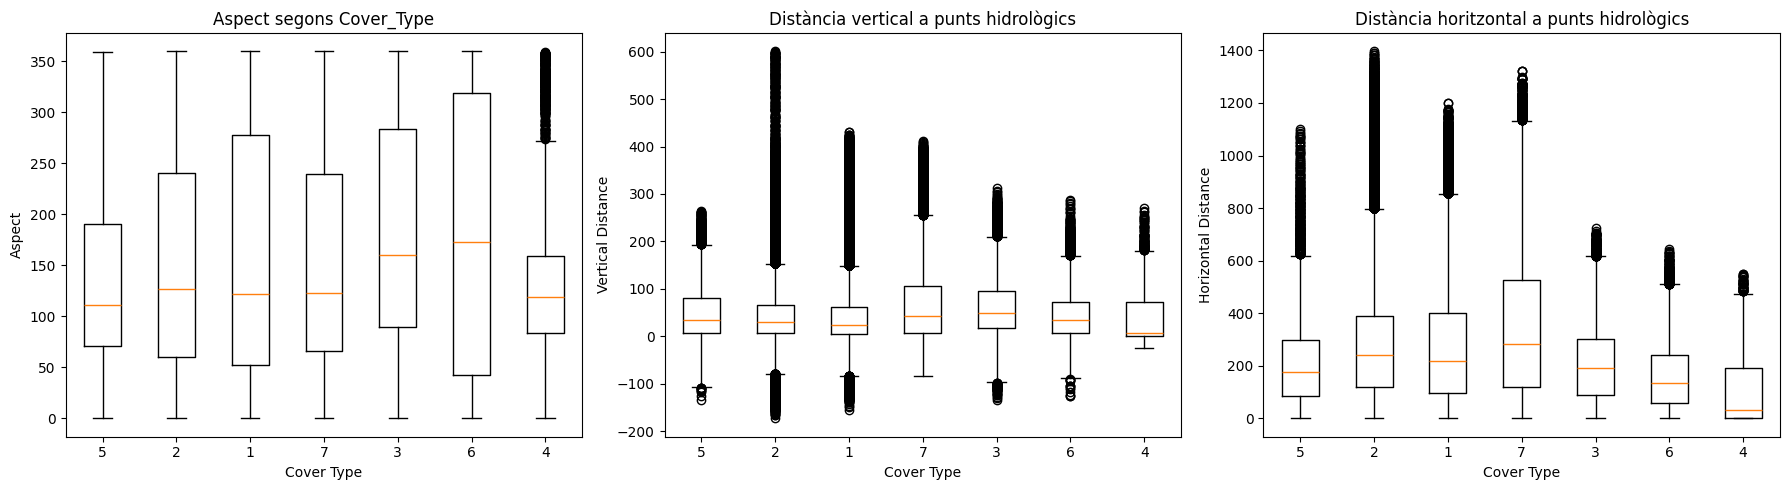

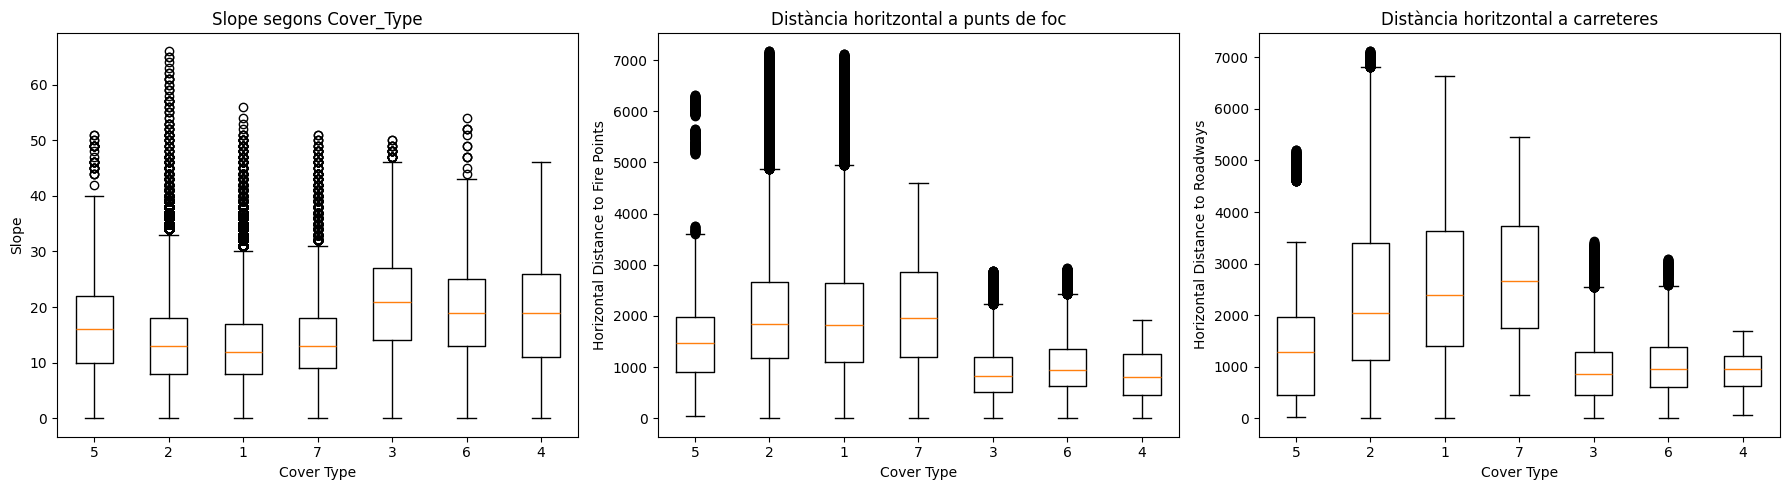

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Aspect'] for ct in clean_data['Cover_Type'].unique()])
axes[0].set_title('Aspect segons Cover_Type', fontsize=12)
axes[0].set_xlabel('Cover Type', fontsize=10)
axes[0].set_ylabel('Aspect', fontsize=10)
axes[0].set_xticklabels(clean_data['Cover_Type'].unique())

axes[1].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Vertical_Distance_To_Hydrology'] for ct in clean_data['Cover_Type'].unique()])
axes[1].set_title('Distància vertical a punts hidrològics', fontsize=12)
axes[1].set_xlabel('Cover Type', fontsize=10)
axes[1].set_ylabel('Vertical Distance', fontsize=10)
axes[1].set_xticklabels(clean_data['Cover_Type'].unique())

axes[2].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Horizontal_Distance_To_Hydrology'] for ct in clean_data['Cover_Type'].unique()])
axes[2].set_title('Distància horitzontal a punts hidrològics', fontsize=12)
axes[2].set_xlabel('Cover Type', fontsize=10)
axes[2].set_ylabel('Horizontal Distance', fontsize=10)
axes[2].set_xticklabels(clean_data['Cover_Type'].unique())

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Slope'] for ct in clean_data['Cover_Type'].unique()])
axes[0].set_title('Slope segons Cover_Type', fontsize=12)
axes[0].set_xlabel('Cover Type', fontsize=10)
axes[0].set_ylabel('Slope', fontsize=10)
axes[0].set_xticklabels(clean_data['Cover_Type'].unique())

axes[1].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Horizontal_Distance_To_Fire_Points'] for ct in clean_data['Cover_Type'].unique()])
axes[1].set_title('Distància horitzontal a punts de foc', fontsize=12)
axes[1].set_xlabel('Cover Type', fontsize=10)
axes[1].set_ylabel('Horizontal Distance to Fire Points', fontsize=10)
axes[1].set_xticklabels(clean_data['Cover_Type'].unique())

axes[2].boxplot([clean_data[clean_data['Cover_Type'] == ct]['Horizontal_Distance_To_Roadways'] for ct in clean_data['Cover_Type'].unique()])
axes[2].set_title('Distància horitzontal a carreteres', fontsize=12)
axes[2].set_xlabel('Cover Type', fontsize=10)
axes[2].set_ylabel('Horizontal Distance to Roadways', fontsize=10)
axes[2].set_xticklabels(clean_data['Cover_Type'].unique())

plt.tight_layout()
plt.show()

Els *boxplots* ens confrimen que, en general, les classes de la variable objectiu 
no presenten diferències importants en la mitjana en característiques, **excepte en les distàncies horitzontals a carreteres i punts d'incendi**, 
on si que hi apareixen algunes diferències entre classes:
- **Els tipus 1, 2 i 7 (Spruce/Fir, Lodgepole Pine i Kummholz) presenten una mitjana més alta que les classes 3, 4 i 6**(Ponderosa Pine, Cottonwood/Willow i Douglas-fir).
- **La classe Krummholz té valors més elevats en totes les variables de distància**, això pot indicar que és una espècie que creix en entorns freds i de més altitud. 
Observem ara un nou boxplot de la variable d'Elevació:

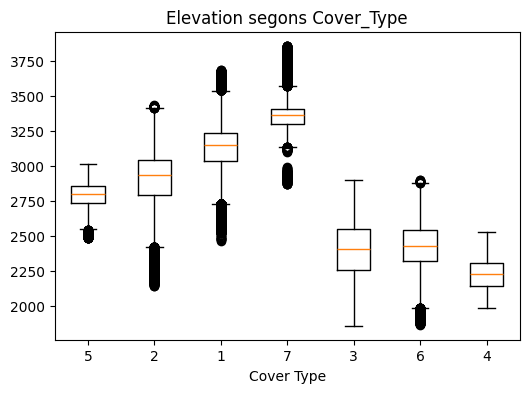

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot([clean_data[clean_data['Cover_Type'] == ct]['Elevation'] for ct in clean_data['Cover_Type'].unique()])
plt.title('Elevation segons Cover_Type', fontsize=12)
plt.xlabel('Cover Type', fontsize=10)
plt.xticks(ticks=range(1, len(clean_data['Cover_Type'].unique()) + 1), labels=clean_data['Cover_Type'].unique())
plt.show()

Ara sí que es confirma que, efectivament, **les classes 1,2 i 7 presenten una elevació mitjana més alta que la resta** i, en conseqüència, 
es troben més lluny de punts d'incendi o de carretera. Fet que té sentit en el context del problema, ja que estem parlant d'un bosc a una zona de muntanya. 

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
**Conclusions**

- La **`Elevation`** mitjana per cada classe és prou distinta, llavors **l'elevació serà un predictor molt important en els nostres models**.
- Les distàncies horitzontals a carreteres i punts d'incendi ens separa les observacions en dos grups ben diferenciats. Podria ser molt interessant aplicar una tècnica de Clustering (mètode no supervisat) i veure si es respecta aquesta divisió.
- Les **`Horizontal_Distance_To_Hydrology`** i **`Horizontal_Distance_To_Roadways`** poden ser forts predictors. 

</div>

---

## **Reducció de dimensionalitat**

L'objectiu d'aquesta secció és seguir explorant les dades per a veure si podem prescindir i crear noves variables **que alleugereixin el nostre dataset sense pèrdua de molta informació**. 

### **Anàlisi de components principals**

#### **Què és l'anàlisi de components principals?**

L'Anàlisi de Components Principals ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)) és una tècnica estadística que s'utilitza per reduir la dimensionalitat d'un conjunt de dades. La idea principal és trobar una nova base de coordenades en la qual les dades es puguin representar de manera més compacta, preservant tanta informació com sigui possible.

Imaginem que tenim un conjunt de dades amb $n$ observacions i $p$ variables. El nostre objectiu és **reduir el nombre de variables mantenint la màxima variabilitat possible**. El PCA ho fa buscant noves variables, anomenades **components principals**, que són combinacions lineals de les variables originals.

Les components principals tenen les següents propietats:

- La primera component principal (denotada com $PC_1$) explica la **màxima variància possible** de les dades.
- La segona component principal ($PC_2$) és **ortogonal** a $PC_1$ i explica la màxima variància restant.
- Aquest procés es repeteix per als components restants.

#### **Com es calculen les components principals?**

Els components principals es calculen resolent el següent problema matemàtic:

$$
\text{Maximitzar } \quad \mathbf{w}^\top \mathbf{S} \mathbf{w} \quad \text{sota la restricció} \quad \|\mathbf{w}\| = 1
$$

On:

- $\mathbf{S}$ és la **matriu de covariància** de les dades.
- $\mathbf{w}$ és un **vector propi**  associat a un **valor propi** de la matriu $\mathbf{S}$.

Els vectors propis de la matriu $\mathbf{S}$ corresponen als **components principals**, i els valors propis indiquen la quantitat de variància explicada per cada component. La primera component principal es correspon amb el major valor propi i així successivament. 

#### **Exemple visual**

Considerem un conjunt de punts distribuïts al llarg d'una línia en un espai bidimensional. Tot i que hi ha dues variables, tota la variabilitat de les dades es pot explicar mitjançant una sola direcció principal (component principal). En aquest cas, el primer component principal ($PC_1$) és la direcció de màxima variància, i podem reduir la dimensionalitat representant les dades només amb aquesta direcció. Llavors el què es fa és l'anterior projecció. 

![Exemple visual del PCA](figures/pca.png)



#### **Conclusió**

El PCA és útil quan treballem amb **dades d'alta dimensionalitat**, ja que ens permet:

- Reduir el nombre de variables.
- Fer que les dades siguin més manejables.
- Facilitar la visualització, **sense perdre massa informació important**.

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Nota**: per començar el nostra PCA, primer escalarem les nostres dades amb l'objectiu que presentin una major homogeneïtat. Molt sovint, les variables amb diferents escales de mesura poden influir en la nostra Anàlisi de Components Principals. És a dir, variables com, en el nostre cas, **`Elevation`** registren majors valors de variància pel fet de tenir una escala de magnitud major que d'altres com **`Slope`** o **`Aspect`** pel que després poden tenir un major pes en el PCA que no es correspon amb una major explicació de la informació. 

Per tant, **anam a estandarditzar les dades** i quantificar la variància explicada per les Components Principals. 
</div>

Explained Variance Ratio: [0.25861187 0.21497551 0.17392279 0.10775358]
Total Variance Explained: 0.7552637548810247


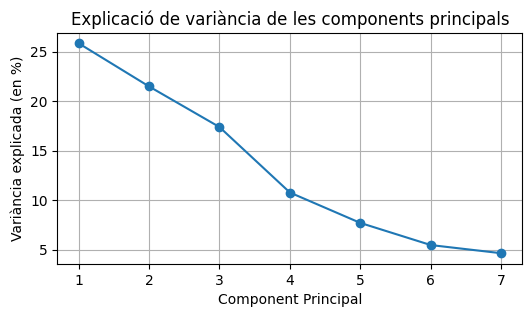

In [11]:
scaler = StandardScaler()
pca_data = scaler.fit_transform(clean_data.iloc[:,0:10])
pca_data = pd.DataFrame(pca_data, index= [i for i in range(len(pca_data[:,0]))])
pca2 = PCA(n_components=7) 
pca = PCA(n_components=4)
pca_result = pca.fit_transform(pca_data)
pca_result2 = pca2.fit_transform(pca_data)

print(f"\033[1mExplained Variance Ratio:\033[0m {pca.explained_variance_ratio_}")
print(f"\033[1mTotal Variance Explained\033[0m: {np.sum(pca.explained_variance_ratio_)}")

explained_variance = pca2.explained_variance_ratio_
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance*100,marker='o',)

plt.title('Explicació de variància de les components principals')
plt.xlabel('Component Principal')
plt.ylabel('Variància explicada (en %)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

#### **Com elegim el nombre de components principals?**

Un dels mètodes més comuns per a l'elecció del nombre de components principals és el **mètode del colze**, vist a l'assignatura 'Anàlisi de Dades' del Grau de Matemàtiques. Consisteix en observar el gràfic anterior i, en funció de l'observat elegir **el nombre a partir del qual la variànça explicada per la resta de valors propis s'estabilitza**. En el nostre cas queda clar que el nombre que cercam és $k=4$, que serà el nombre de components principals que obtindrem i que, conjuntament, explicaran un $75.5%$ de la variànça total de les dades. 

In [12]:
pca.components_

array([[ 0.10422895,  0.49531284, -0.08553026,  0.10113478,  0.08480429,
         0.11345396, -0.45729307,  0.37639696,  0.59520236, -0.03371642],
       [-0.36781821,  0.14417116,  0.52964973, -0.03579432,  0.20905765,
        -0.38917113, -0.35089664, -0.36493087,  0.01337764, -0.33237501],
       [ 0.34359451, -0.07388612,  0.14545012,  0.6474536 ,  0.61520507,
         0.14362557,  0.0142647 , -0.13167205, -0.10327921,  0.09390722],
       [ 0.03217267,  0.06118663,  0.34844345, -0.2249307 , -0.13558356,
         0.51630455, -0.28393927, -0.3584566 , -0.00632869,  0.57367977]])

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Observacions**: les variables **`Horizontal_Distance_To_Fire_Points`** i la **`Horizontal_Distance_To_Roadways`** presenten uns coeficients molt alts en comparació a la resta de variables. Això és, aquestes variables semblen tenir un pes important pel que fa a la seva explicació. 

**És possible que siguin predictors importants!** 
Més endavant ho acabarem de confirmar. 
</div>

Un dels avantatges més importants en l'Ànalisi de Components Principals és que ara, **podem representar les nostres dades com punts en el pla**, on les dues coordenades es correspondran, respectivament, amb la 1a CP i la 2a CP. 

**Objectiu**: veure si les dues primeres components principals ens permetren establir un patró per entendre millor les dades. 

Observem la següent gràfica de dispersió, feta amb **`scatter`** de la llibreria **`matplotlib`** de Python. 

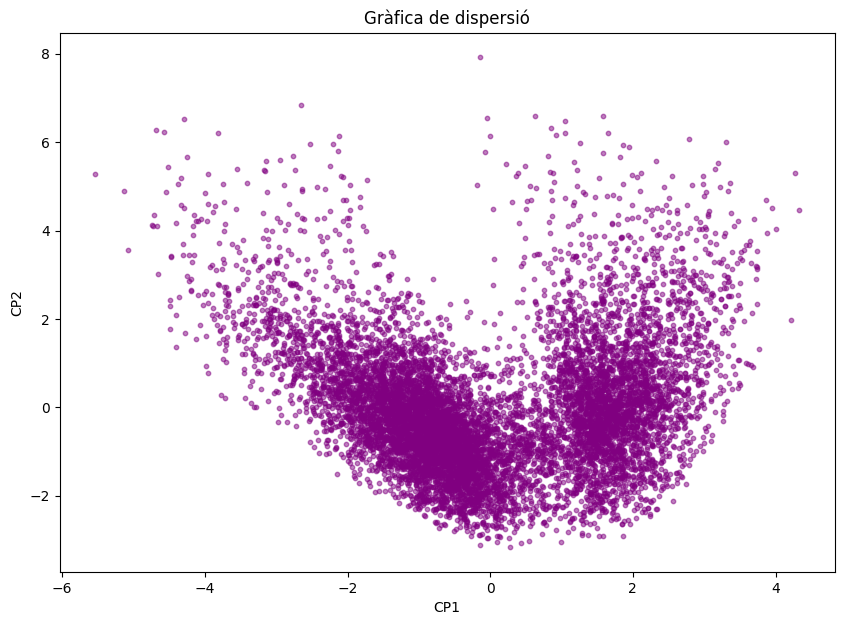

In [13]:
pca_result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_result_df = pd.concat([pca_result_df, obj], axis=1)
plt.figure(figsize=(10, 7))
colors = ['#FF6F61', '#5DADE2']

plt.scatter(
    data=pca_result_df.sample(n=10000),
    x='PC1', y='PC2', 
    alpha=0.5,
    color='purple',
    s=10,
)

plt.title('Gràfica de dispersió')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Qüestió**: les podem agrupar segons les seves característiques?
</div>

### **Clustering**

El [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) de dades comprèn un conjunt de tècniques d'aprenentatge no supervisades que ens permeten agrupar les dades (no etiquetades) segons les seves distàncies i característiques. Alguns dels mètodes més clàssics de *clustering* són el *kmedoids*, *kmeans* i *CLARA*. També existeixen tècniques d'agrupament basades en la jerarquia de clusters i d'altres no jeràrquics com *CLARA* pensats per a grans *datasets* com el nostre. En el nostre cas, ens hem estimat més fer servir el mètode no supervisat `kmeans`, ja que l'hem vist a classe de teoria. 

#### **K-means**
Donat un conjunt d'observacions $(\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n)$, on cada observació és un vector real de d dimensions, **k-means** construeix una partició  de les observacions en k conjunts $(k \leq n) \quad \mathbf{S} = \{S_1, S_2, \ldots, S_k\}$.  
A fi de **minimitzar la suma dels quadrats de les distàncies euclidianes dins cada cluster**, o la distància de cada punt al seu 'centre' de cluster:
$$
\underset{\mathbf{S}}{\arg \min} \sum_{i=1}^{k} \sum_{\mathbf{x}_j \in S_i} \|\mathbf{x}_j - \boldsymbol{\mu}_i\|^2
$$

on $\boldsymbol{\mu}_i$ és la mitjana de punts en $S_i $.

Val a dir que, s'ha d'especificar el nombre de clusters abans d'aplicar l'algorisme. En el nostre cas, gràcies a la gràfica de dispersió anterior, sembla intuïtiu aplicar-ho directament amb un nombre de clusters $k=2$. 

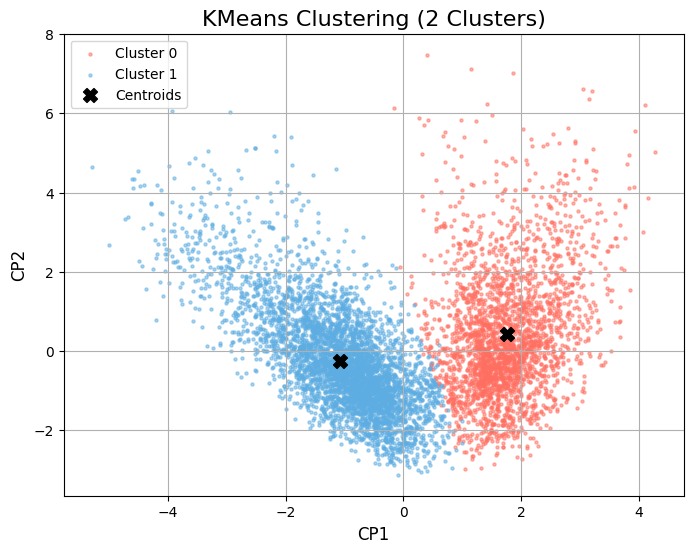

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
pca_result_df['Cluster'] = kmeans.fit_predict(pca_result).copy()
data_clust = pca_result_df.sample(n=7000)

plt.figure(figsize=(8, 6))
colors = ['#FF6F61', '#5DADE2']
for cluster in range(2):
    cluster_data = data_clust[data_clust['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                color=colors[cluster], alpha = 0.5, s=5, label=f'Cluster {cluster}')
 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', marker='X', s=100, label='Centroids')

plt.title('KMeans Clustering (2 Clusters)', fontsize=16)
plt.xlabel('CP1', fontsize=12)
plt.ylabel('CP2', fontsize=12)
plt.legend()
plt.grid()
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Discussió de resultats**: observam que la separació que realitza l'algorisme **`kmeans`** és entenedora i intuïtiva en tant que, deixa clarament un cluster més escorat a la dreta, pel que fa a la PC1, i l'altre més cap a l'esquerra. Tenim idò, 2 grups de dades ben diferenciats en funció de la PC1, que alhora ve definida pels pesos de les variables originals. Així com anunciàvem abans, les variables que expliquen millor les dades i que, en els models predictors tendran un rol més important són: 

- **`Horizontal_Distance_To_Fire_Points`**
- **`Horizontal_Distance_To_Roadways`**
- **`Hillshade_9pm`**

</div>

---

## **Aplicació dels models i prediccions**

Anam a ajustar els diferents models introduïts al principi amb les nostres dades. Les dades què farem servir són les dades amb la **dimensionalitat reduïda i estandarditzades**, que tenim en la variable **`clean_data`**. L'objectiu dels apartats anteriors ha estat, per tant, poder arribar a entendre les noves dades amb una reducció del nombre de variables sense molta pèrdua d'informació.

### **Perceptró**

#### **Explicació breu**

El [Perceptró](https://en.wikipedia.org/wiki/Perceptron) és un dels models més senzills de xarxes neuronals artificials. Va ser introduït per Frank Rosenblatt el 1958 i s’utilitza per a problemes de classificació binària, és a dir, per separar dades en dues classes. El perceptró pren com a entrada un conjunt de característiques, aplica una combinació lineal de les entrades amb uns pesos, i genera una sortida binària mitjançant una funció d’activació (habitualment una funció esglaó).

El perceptró aprèn ajustant els pesos de les entrades segons un algorisme d'aprenentatge supervisat, que busca minimitzar els errors de classificació.

#### **Fórmula del perceptró**

En un perceptró, la sortida $y$ es calcula de la següent manera:

$$
y = h\left( \mathbf{w} \cdot \mathbf{x} + b \right)
$$

On:
- $\mathbf{w}$ és el vector de pesos.
- $ \mathbf{x}$ és el vector d’entrades.
- $b$ és el biaix (bias).
- $ h$ és la funció esglaó, que retorna $1$ si l'argument és positiu i $0$ si és negatiu.

La funció esglaó es defineix com:

$$
h(z) = 
\begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}
$$

#### **Algorisme d’aprenentatge del perceptró**

1. Inicialitzar els pesos $\mathbf{w}$ i el biaix $b$ amb valors petits (habitualment zero).
2. Per cada exemple d’entrenament $(\mathbf{x}_i, y_i)$:
   - Calcular la sortida $\hat{y}_i = \text{sign}\left( \mathbf{w} \cdot \mathbf{x}_i + b \right)$.
   - Si $ \hat{y}_i \neq y_i $, actualitzar els pesos i el biaix:
     $$
     \mathbf{w} \leftarrow \mathbf{w} + \alpha (y_i \mathbf{x}_i)
     $$
     $$
     b \leftarrow b + \alpha y_i
     $$
   On $\alpha$ és la taxa d’aprenentatge, típicament $\alpha=1$

Aquest algorisme continua fins que tots els exemples es classifiquen correctament o fins a assolir un nombre màxim d'iteracions. El model de perceptró és un model lineal de Machine Learning que **només fa servir les variables quantitaives per a predir**, per tant serà un model prou limitat en la seva precisió de predicció. 

Com venim fent a classe de pràctiques, separarem les dades numèriques amb reducció de dimensionalitat en dos conjunts, d'entrenament i de test. Tot seguit, ajustarem el model fent servir la llibreria **`sklearn`**:


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, obj, test_size = 0.33, random_state = 42)
clf = linear_model.Perceptron(tol=1e-09, random_state=42)

clf.fit(X_train, Y_train);

x_intercept = (0, (-clf.intercept_ / clf.coef_[0][1])[0])
y_intercept = ((-clf.intercept_ / clf.coef_[0][0])[0], 0)

pred = clf.predict(X_test)

print("\n\033[1mInforme de classificació:\033[0m")
print(classification_report(Y_test, pred, zero_division=0))


Informe de classificació:
              precision    recall  f1-score   support

           1       0.50      0.52      0.51     69978
           2       0.59      0.65      0.62     93523
           3       0.59      0.38      0.46     11696
           4       0.00      0.00      0.00       875
           5       0.11      0.04      0.06      3225
           6       0.27      0.05      0.08      5762
           7       0.36      0.33      0.34      6675

    accuracy                           0.54    191734
   macro avg       0.35      0.28      0.30    191734
weighted avg       0.53      0.54      0.53    191734



#### **Avaluació del rendiment: K-fold**

En aquesta pràctica, per als models lineals Perceptró i Regressió Logística hem decidit fer servir el mètode (i codi) K-fold per a estudiar el rendiment d'ambdós models, així com hem anat vegent a classe de teoria. 

##### **K-Fold i Validació Creuada**

La **validació creuada** és una tècnica estadística que s'utilitza per avaluar el rendiment d'un model de manera més fiable. Es fa servir per evitar problemes com l'overfitting, proporcionant una estimació més robusta del rendiment del model en dades que no han estat utilitzades durant l'entrenament.

La **K-Fold Cross-Validation** és una de les formes més comunes de realitzar validació creuada. El procediment funciona de la següent manera:

1. Es divideixen les dades en **K** subconjunts o **folds** de mida similar.
2. Es realitza l’entrenament del model **K vegades**, de manera que:
   - A cada iteració, un dels **folds** s’utilitza com a conjunt de validació, mentre que els **K-1** folds restants s’utilitzen com a conjunt d’entrenament.
3. Es calcula una mètrica d’avaluació (com l'accuracy, la precisió o el RMSE) per a cadascun dels **K** entrenaments.
4. La mètrica final es calcula com la **mitjana de les mètriques** obtingudes en cada iteració.

#### **Avantatges de K-Fold Cross-Validation**

- **Avaluació fiable:** Com que el model s'entrena i s'avalua diverses vegades, es redueix la variabilitat associada a la divisió del conjunt de dades.
- **Millor ús de les dades:** Cada observació s’utilitza tant per a l’entrenament com per a la validació.
- Evita biaixos associats a una única divisió aleatòria de les dades en entrenament i test.

#### **Funcionament**

Si tenim un conjunt de dades $D = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\}$, el procediment de K-Fold es pot expressar així:

1. Dividim $ D$ en $K$ subconjunts $( D_1, D_2, \ldots, D_K)$.
2. A cada iteració $i$ (amb $ i \in \{1, 2, \ldots, K\})$:
   - $D_i$ s'utilitza com a conjunt de validació.
   - Els subconjunts restants $\{D_1, \ldots, D_{i-1}, D_{i+1}, \ldots, D_K\}$ s'utilitzen per entrenar el model.
3. La mètrica final s'obté com:

$$
\text{Mètrica final} = \frac{1}{K} \sum_{i=1}^{K} \text{Mètrica}(i)
$$

Aquí tenim el codi del mètode que hem fet servir, inspirat en el que hem vist a classe: 

In [16]:
def cross_validate(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    return np.mean(scores), scores, model

mean_accuracy, fold_accuracies, clf = cross_validate(clf, X_train, Y_train, k=5)
print(f"\033[1mAccuracy mitjana (5 folds):\033[0m {mean_accuracy:.2f}")
print("\033[1mAccuracy per cada fold:\033[0m", fold_accuracies)

Accuracy mitjana (5 folds): 0.57
Accuracy per cada fold: [0.5379289971228935, 0.5618577887381833, 0.6058621043978627, 0.5912015927043863, 0.5572795581529767]


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Resultats**
- Hem obtingut una accuracy mitjana amb $k=5$ en el k-fold, del $0.57$.
- Està clar que no són uns resultats desitjables, no és un model que poguem fer servir per aquest tipus de dades.
- El motiu principal per als mals resultats creim que és **la falta de variables categòriques que expliquen millor les nostres dades**. És a dir, el Perceptró només ha tingut en compte un subconjunt de l'espai de característiques: el numèric.
- En les classes 

### **Regressió Logística**

La [Regressió logística](https://en.wikipedia.org/wiki/Logistic_regression) és un model de classificació utilitzat per predir una variable categòrica (binària o *multiclass*) a partir de variables explicatives. Malgrat el seu nom, es tracta d’un model de **classificació**, no de regressió, i es basa en l’aplicació d’una funció logística sobre una combinació lineal de les variables d'entrada.

#### **Funció de la regressió logística**

Per a un problema de classificació binària (0 o 1), la regressió logística calcula la probabilitat que una observació pertanyi a la classe $y = 1$ utilitzant la funció sigmoide:

$$
P(y = 1 \mid \mathbf{x}) = \sigma(\mathbf{w} \cdot \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}}
$$

On:
- $\mathbf{x}$ és el vector de característiques d'entrada.
- $\mathbf{w}$ és el vector de pesos.
- $b$ és el biaix (bias).
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ és la **funció sigmoide**, que transforma el valor en una probabilitat entre 0 i 1.

##### **Decisió final**

Després de calcular la probabilitat $P(y = 1 \mid \mathbf{x})$, el model pren una decisió utilitzant un **llindar** (per defecte, 0.5):

$$
\hat{y} = 
\begin{cases} 
1 & \text{si } P(y = 1 \mid \mathbf{x}) \geq 0.5 \\
0 & \text{si } P(y = 1 \mid \mathbf{x}) < 0.5
\end{cases}
$$


In [17]:
categoriques = data.iloc[:, 10:14]
data_LR = pd.concat([categoriques, pca_data, soil_final], axis = 1)
data_LR = data_LR.apply(pd.to_numeric, errors='coerce')
data_LR.columns = data_LR.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(data_LR, obj, stratify=obj, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000, tol=1e-1, solver='saga')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n\033[1mInforme de classificació:\033[0m")
print(classification_report(y_test, y_pred, zero_division=0))

mean_accuracy, fold_accuracies, clf = cross_validate(model, X_train, y_train, k=5)
print(f"\033[1mAccuracy mitjana (5 folds):\033[0m {mean_accuracy:.2f}")
print("\033[1mAccuracy per cada fold:\033[0m", fold_accuracies)


Informe de classificació:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     69907
           2       0.75      0.80      0.77     93489
           3       0.67      0.77      0.72     11799
           4       0.64      0.29      0.40       907
           5       0.91      0.01      0.01      3133
           6       0.43      0.27      0.33      5731
           7       0.73      0.56      0.64      6768

    accuracy                           0.72    191734
   macro avg       0.69      0.49      0.51    191734
weighted avg       0.72      0.72      0.71    191734

Accuracy mitjana (5 folds): 0.72
Accuracy per cada fold: [0.7189169749280724, 0.7181848540896013, 0.717516954377312, 0.7183610558088754, 0.7169096397148546]


<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Resultats**
- Hem obtingut una accuracy mitjana amb $k=5$ en el k-fold, del $0.72$.
- Notam una millora amb respecte del Perceptró, això és perquè ara, hem pogut fer servir les variables categòriques. És a dir, **ara hem pogut usar més informació del bosc mostrejat**. 


### **Arbres de decisió**

L'algorisme [*Decision trees*](https://en.wikipedia.org/wiki/Decision_tree_learning) utilitza un arbre de decisió com a model predictiu. En aquestes estructures, les fulles de l'arbre representen etiqueres de classe i els nodes representen conjuncions de característiques que condueixen a aquestes fulles. En el context de l'aprenentatge automàtic, aquest model és àmpliament usat degut a la seva simplicitat d'implementació.

#### **Configuracions inicials**

Com hem anat fent anteriorment, primer carregarem les dades i diferenciarem entre les característiques i la variable objectiu. Degut a la naturalesa del conjunt, sabem que manipulam dades numèriques i categòriques. Aquest és un dels avantatges d'aquest model, a diferencia d'altres com el [Perceptró](#perceptro), el qual només manipula *features* numèriques. Anàlogament als anteriors models, obtenim una subconjunt de dades d'entrenament i un altre per a testejar les prediccions de l'arbre; i procedim a crear el model base.

In [18]:
dt_data = clean_data.copy()
X = dt_data.drop('Cover_Type', axis=1) 
y = dt_data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

#### **Selecció dels millors hiperparàmetres**

Un cop tenim el model, hem de seleccionar quins son els millors candidats per a cada hiperparàmetre. Hem preguntat a [Claude (v. Sonnet 3.5)](https://www.anthropic.com/news/claude-3-5-sonnet) d'Anthropic, i ens ha recomanat que usem GridSearch per a obtenir els millors valors dels hiperparàmetres agafant l'*score* `accuracy` com a índex de referència. Segons la documentació disponible a Internet, alguns dels hiperparàmetres que més influeixen en aquest model són els següents:

- **`max_depth`**: controlam la profunditat de l'arbre. Si és molt petit, es pot donar *underfitting* i en cas contrari pot provocar *overfitting*. Si val `none` permet que l'arbre creixi la màxima profunditat.
- **`min_samples_split`**: és el nombre mínim de mostres per dividir un node, on valors alts ajuden a prevenir l'*overfitting*.
- **`min_samples_leaf`**: similarment a l'anterior, és el nombre mínim de mostres per fulla. Valors petits provoquen que no es generin nodes molt petits.
- **`criterion`**: indica la qualitat de la divisió. `gini` és l'índex d'impuresa de Gini i `entropy` mesura la ganància d'informació.
  
A continuació ajustarem el model amb les dades d'entrenament i n'informarem dels millors valors seleccionats per entrenar el model amb els hiperparàmetres configurats correctament.

In [19]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\033[1mMillors valors dels hiperparàmetres:\033[0m")
print(grid_search.best_params_)

best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

Millors valors dels hiperparàmetres:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### **Evaluació de les prediccions del model**

Per a l’avaluació, farem servir diverses mètriques, com la precisió i la puntuació F1. Així, podrem analitzar tant la qualitat global de les prediccions com la seva capacitat per gestionar tant classes positives com negatives de manera equilibrada. En aquest punt, també podem explorar altres aspectes, com la importància de les característiques, per entendre quines variables estan influint més en les prediccions del model.


Informe de classificació:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.82      0.81      0.82       526
           5       0.84      0.83      0.84      1995
           6       0.88      0.87      0.87      3489
           7       0.95      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203


Primeres 10 prediccions VS valors reals:
        Actual  Predicted
250728       1          1
246788       2          2
407714       2          2
25713        2          2
21820        2          2
251274       3          3
52354        2          2
246168       1          1
477113       2          2
78834        2          2


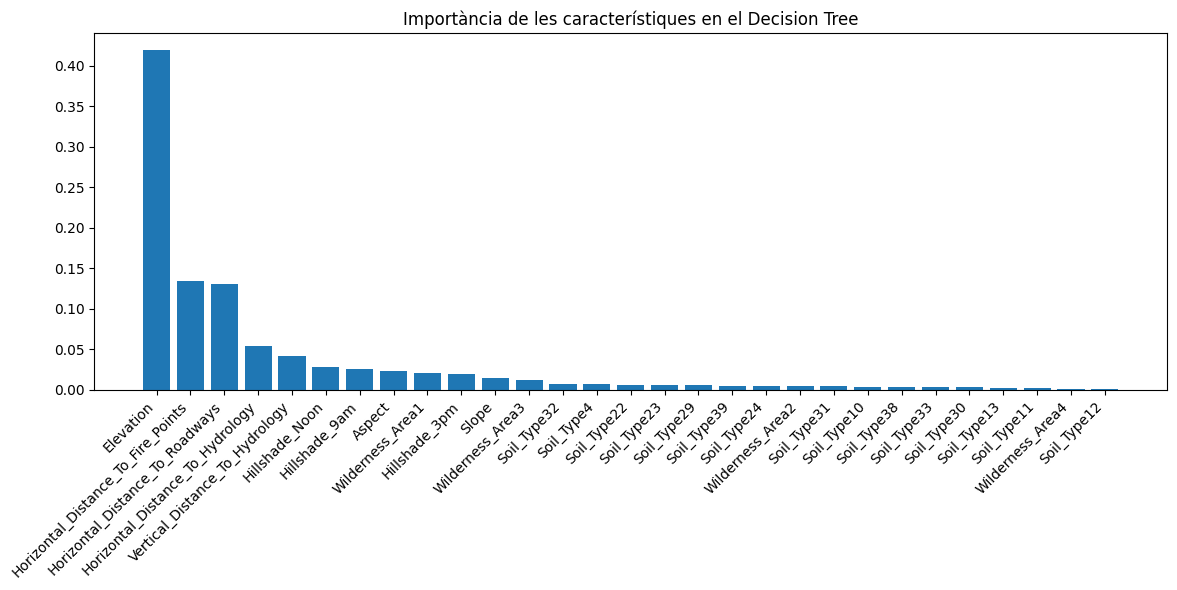

In [20]:
print("\n\033[1mInforme de classificació:\033[0m")
print(classification_report(y_test, y_pred_dt))

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})
print("\n\033[1mPrimeres 10 prediccions VS valors reals:\033[0m")
print(predictions_df.head(10))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Importància de les característiques en el Decision Tree')
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Resultats**: com a conclusions relatives a aquest model, destaca la bona puntuació en mètriques com l'`accuracy`. Això és normal degut a que l'hem prioritzat a l'hora de fer el GridSearch, però no deixa de ser un bon resultat tenint en compte els resultats dels anteriors models. També s'ha de destacar que el temps d'execució és molt inferior al que s'esperava segons les referències a Internet tot i haver inclòs el `GridSearch`. Això es deu en gran mesura a la bona neteja de dades que s'ha realitzat al principi, la que ens permet executar el model en un temps més que raonable sense haver de sacrificar gaire precisió en les prediccions del model. D'altra banda, és interessant veure com la característica `Elevation` determina en molta mesura la predicció final, amb més d'un **40%** de rellevància.

</div>

### **Boscs aleatoris**

Aquest model és conegut com [*Random forests*](https://en.wikipedia.org/wiki/Random_forest) en al·lusió a "una massa d'arbres". Com molt bé explica Martin Keen al [video informatiu d'IBM](https://youtu.be/gkXX4h3qYm4?feature=shared), aquest model és una espècie d'evolució de l'algorisme que hem tractat en l'apartat anterior. Si bé el *decision trees* pot tendir a reportar certs problemes relacionats amb l'*overfitting* i el *bias*, el model actual pot corregir aquesta problemàtica agafant conjunts aleatoris del *dataset* i ajustar varis arbres de decisió, fent que les prediccions siguin més certeres.

#### **Inicialització de dades**
Seguint la metodologia estàndard, separarem les dades en un conjunt d'entrenament i un de test, i procedirem a construir el nostre model inicial. Aquestes primeres passes ens permetran establir una base sòlida abans de començar a ajustar i millorar el rendiment del model.

In [21]:
rf_data = clean_data.copy()
X = rf_data.drop('Cover_Type', axis=1) 
y = rf_data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Significat dels hiperparàmetres**

La selecció dels millors hiperparàmetres l'hem realitzat exactament al procés anterior. D'una banda, hem trobat que els hiperparàmetres més interessants per manipular són els següents:

- **`n_estimators[100, 200, 300]`**: és el nombre d'arbres que contendrà el nostre bosc. A major nombre d'arbres, millora el rendiment del model però augmenta el temps de computació requerit.
- **`max_depth[10, 20, 30, None]`**: similarment al *decision tree*, controlam la profunditat de l'arbre. Un valor petit pot produir *underfitting* i valors grans pot provocar *overfitting*.
- **`min_samples_split[2, 5, 10]`**: nombre mínim de mostres per dividir un node. Valors alts disminueixen l'*overfitting*.
- **`min_samples_leaf[1, 2, 4]`**: similarment a l'anterior, és el nombre mínim de mostres per fulla. Valors petits provoquen que no es generin nodes molt petits.
- **`max_features['sqrt', 'log2']`**: nombre de característiques a considerar a cada decisió.

L'ús de GridSearch en aquest cas és similar a l'ús que n'hem fet al model anterior. En canvi, el cost computacional que requereix aplicar la funció a aquest model és molt elevat. En primera instància, ho hem intentat processar en local i, després d'una execució de més de 12 hores, hem obtingut que els millors hiperparàmetres són els següents: 

 `{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}`
 
<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
**Observació**: no adjuntam aquest codi de GridSearchCV perqué és el mateix procés que hem indicat amb anterioritat i l'execució completa del Jupyter Notebook es veuria molt afectada per a obtenir un altre pic els mateixos resultats.

In [22]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

print("\033[1mEntrenant el model Random Forest...\033[0m")

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Entrenant el model Random Forest...


#### **Avaluació de les prediccions del model**

Un cop hem entrenat el model i obtenim les prediccions corresponents en funció dels millors valors dels hiperparàmetres determinats anteriorment, podem procedir a analitzar els resultats. 


Informe de classificació:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     42557
           2       0.95      0.98      0.96     56500
           3       0.94      0.97      0.95      7121
           4       0.92      0.83      0.87       526
           5       0.95      0.78      0.86      1995
           6       0.94      0.90      0.92      3489
           7       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203


Primeres 10 prediccions VS valors reals:
        Actual  Predicted
250728       1          1
246788       2          2
407714       2          2
25713        2          2
21820        2          2
251274       3          3
52354        2          2
246168       1          1
477113       2          2
78834        2          2


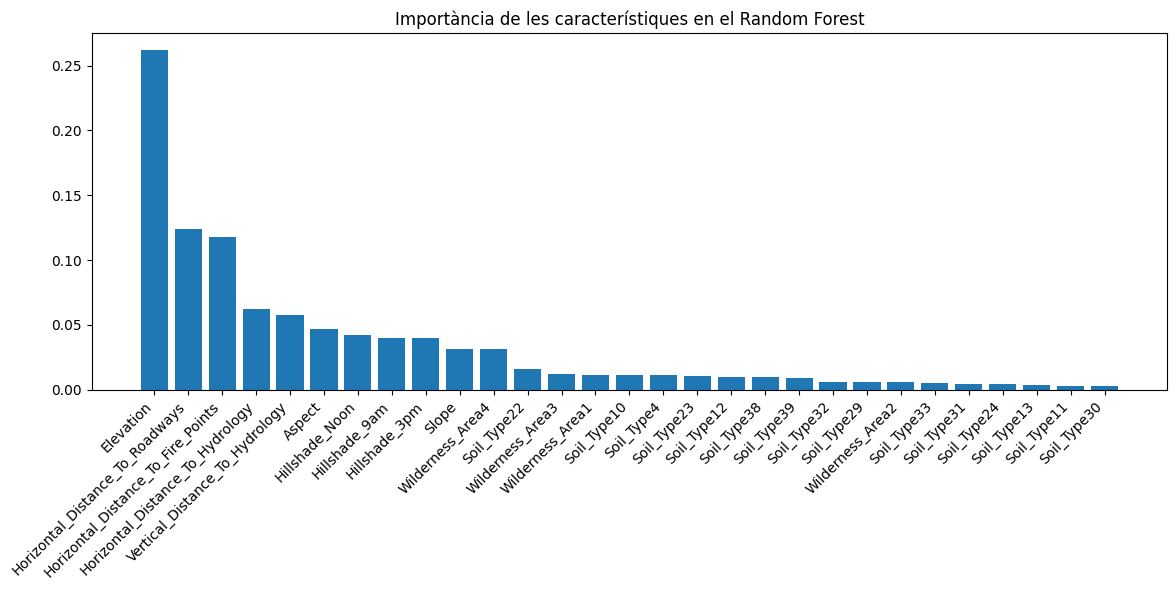

In [23]:
print("\n\033[1mInforme de classificació:\033[0m")
print(classification_report(y_test, y_pred_rf))

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})
print("\n\033[1mPrimeres 10 prediccions VS valors reals:\033[0m")
print(predictions_df.head(10))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Importància de les característiques en el Random Forest')
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">
    
**Conclusions**: si observam els resultats obtinguts, veim que no són gaire distints als que s'obtenien al model [Decision tree](decision-tree). Ara hem incrementat quasi un **5%** les mesures de rendiment, però el que ha variat més és l'importància de les pròpies característiques. L'`Elevation` ha perdut protagonisme i l'han obtingut característiques com l'`Horizontal_Distance_To_Roadways` o l'`Horizontal_Distance_To_Fire_Points`. Això segurament es deu a que el model anterior, el node que determinava l'elevació a l'arbre de decisió anterior esteia a prop de l'arrel o n'era directament el node pare, fent que prop de la meitat dels arbres a predir es veuen influïts per aquesta característica. A l'hora d'implementar *random forests* i seleccionar distints arbres amb decisions aleatòries, l'importància d'aquesta decisió es veu decrementada considerablement.

### **Màquines de vectors de suport**

El darrer algoritme d'aprenentatge utilitzat són els [*Support Vector Machine (SVM)*](https://en.wikipedia.org/wiki/Support_vector_machine). El seu objectiu és trobar un [hiperplà](https://en.wikipedia.org/wiki/Hyperplane) òptim que separi les diferents classes de dades amb el màxim marge possible, minimitzant així l'error en la classificació. SVM busca els punts més propers a la frontera de separació, anomenats vectors de suport, que són els que tenen més influència en la definició d'aquesta frontera. En el nostre cas en el que les dades no són linealment separables, SVM usa mètode del nucli per transformar les dades a un espai de més dimensions, on les classes sí es poden separar de manera lineal. 

#### **Configuracions inicials**

Carregarem les dades i diferenciarem entre les característiques i la variable objectiu.

In [24]:
svm_data = clean_data.copy()
X = svm_data.drop('Cover_Type', axis=1) 
y = svm_data['Cover_Type']

categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Selecció dels millors hiperparàmetres**

La tria dels millors valors per als hiperparàmetres d'aquest darrer model ha estat lleugerament diferent. En primer lloc, els més interessants són els següents:

- **`C`**: és un paràmetre de regularització. Controla l'intercanvi entre tenir un marge de decisió més ampli i minimitzar els errors de classificació. Valors més petits impliquen major regularització.
- **`kernel`**: tipus de kernel a implementar. Es pot disposar d'un kernel lineal (`linear`) o gaussià, depenent de la naturalesa de les dades.
- **`gamma`**: coeficient per a kernels no lineals. Controla l'influència d'un sol punt d'entrenament.

Per a obtenir els valors que optimitzassin la relació entre el *dataset* i el model voliem usar un altre cop `GridSearch`, com anteriorment. Malgrat això, els temps d'execució són amb diferència els més elevats. Això és degut als càlculs que es realitzen a l'hora d'usar un kernel no lineal, on es necessita calcular la matriu de Gram. Aquest càlculs suposen un cost computacional $O(N^2)$. Si a més li aplicam la funció gridsearch, el temps és inassumible. Una solució que vam plantejar va ser fer ús de la plataforma [Google Colab](https://colab.research.google.com), i així alliberar els nostres ordinadors de la càrrega computacional i obtenir els resultats amb unes millors màquines. Tot i així, el temps de computació que requeria era massa elevat per al pla gratuït. 

Finalment la solució per la que ens hem decantat ha estat establir nosaltres els valors en funció del que consideram més coherent amb les dades:

 `{'C': 10, 'kernel': 'rbf', 'gamma': 'auto'}`


In [25]:
svm = SVC(
    C=10,
    kernel='rbf',
    gamma='auto',
    random_state=42
)

print("\033[1mEntrenant el model SVM...\033[0m")

svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

Entrenant el model SVM...


#### **Informe de rendiment**

A continuació es detallen els informes dels resultats obtinguts amb aquest darrer model, amb el corresponent informe de classificació i una matriu de confusió per a destacar quines classes són les que predominen a l'hora de generar prediccions errònies.


Informe de clasificació:
              precision    recall  f1-score   support

           1       0.86      0.79      0.83     42557
           2       0.83      0.90      0.87     56500
           3       0.80      0.88      0.84      7121
           4       0.81      0.62      0.70       526
           5       0.86      0.38      0.53      1995
           6       0.75      0.59      0.66      3489
           7       0.91      0.86      0.88      4015

    accuracy                           0.84    116203
   macro avg       0.83      0.72      0.76    116203
weighted avg       0.84      0.84      0.84    116203


Primeres 10 prediccions VS valors reals:
        Actual  Predicted
250728       1          1
246788       2          3
407714       2          2
25713        2          2
21820        2          2
251274       3          3
52354        2          2
246168       1          1
477113       2          1
78834        2          2


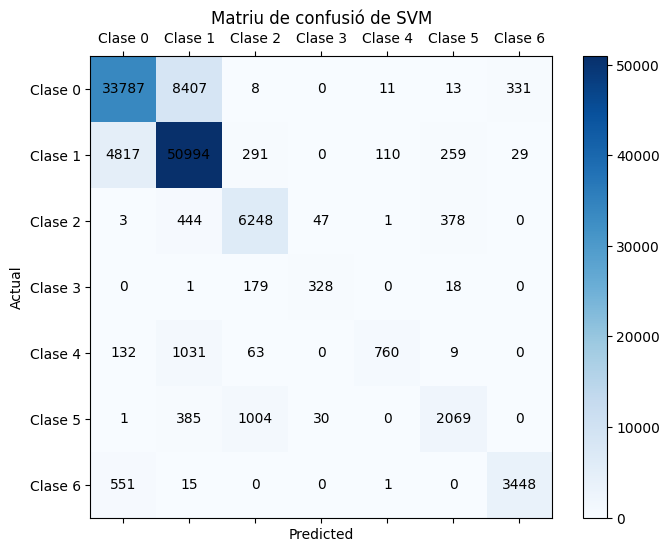

In [26]:
print("\n\033[1mInforme de clasificació:\033[0m")
print(classification_report(y_test, y_pred_svm))

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svm
})
print("\n\033[1mPrimeres 10 prediccions VS valors reals:\033[0m")
print(predictions_df.head(10))

cm = confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
num_classes = cm.shape[0]  
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))
class_labels = [f'Clase {i}' for i in range(num_classes)]
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

plt.title('Matriu de confusió de SVM')
plt.show()

<div style="border: 2px solid black; padding: 10px; border-radius: 5px;">

**Resultats obtinguts**: els resultats del darrer model suposen un decrement en les mesures de rendiment dels arbres de decisió i arbres aleatoris. Encara així es veu que s'obtenen bones estadístiques comparat amb els models lineals. La selecció d'hiperparàmetres hem vist que és correcta. Depenent del tipus de dades, el kernel usat i el coeficient de regularització es podrien arribar a obtenir encara millors *scores*. El que és rellevant és l'importància de la característica `Elevation`, la qual veim que no té tanta importància com en el [*Decision tree*](#arbres-de-decisió).

</div>

---

## **Discussió dels resultats i conclusió**

En aquest apartat final abarcarem tres punts prou importants que reflecteixen tots els àmbits en els que es poden obtenir una sèrie de conclusions respecte del treball realitzat.

### **Observacions respecte de les dades**

Una frase que ens ha recalcat el [Dr. Xavi Varona](https://www.uib.cat/personal/ABTE5MDcz/) és l'**importància fonamental de les dades**. Sense una bona conclusió respecte d'elles no es podria dir que s'han assolit els conceptes treballats a l'hora de desenvolupar la pràctica. Per això, volem destacar els següents punts:
- Un factor comú a tots els models ha estat la importància de les variables **`Elevation`**, **`Horizontal_Distance_To_Roadways`**, **`Horizontal_Distance_To_Fire_Points`**, **`Horizontal_Distance_To_Hydrology`**.  Aquestes variables, com veníem assenyalant a l'EDA, han estat predictors importants.
- Una bona neteja de dades, incloent la reducció de dimensionalitats i els diversos anàlisis que s'han duit a terme són imprescindibles per una gestió eficient dels recursos computacionals. En models com l'[*SVM*](#màquines-de-vectors-de-suport), sense un escalat de dades, el temps d'execució es converteix en una tasca quasi impossible.

### **Comparativa dels models**

Els models amb millors mètriques han estat els **no lineals**. Això es deu a què els models parteixen de l'hipòtesi de que la variable objectiu és lineal dins l'espai de característiques. En canvi, **els models no lineals ens permeten capturar relacions més complexes** i per això amb les dades concretes del nostre *dataset* s'obtenen millors mètriques d'*f1-score*, *precision* i *recall*. Tot i que aquest tipus de models ens han donat molt bons resultats aplicats al nostre problema en concret, l'elecció del model depèn de la natura del problema i les dades a manipular. Un model més complex no sempre és millor, i un bon procés de tractament de dades és clau per a l'èxit del model.

### **Coneixements adquirits**

A nivell grupal, aquesta pràctica ens ha permès descobrir la versatilitat de les llibreries de *Python* relacionades amb la ciència de dades i la bona sinèrgia que es forma amb l'entorn de *Jupyter* per a poder presentar uns informes complets en forma de *notebooks*. D'altra banda, aquest punt fort de les llibreries pot produir una "corrupció de l'objectiu inicial". Això es deu a què degut a la facilitat d'aplicació de certs models, és molt fàcil deixar d'entendre què està passant per darrere amb les dades. És per aquest motiu que un sòlid coneixement de què fan realment els models o per a quin tipus de dades estàn enfocats ha estat imprescindible.